In [15]:
from FashionMnistDatasets import AlexNetMnistFashionDataset, SiamesNetFashionMnistDataset
from torch.utils.data import DataLoader
from SiamesAlexNet import SiamesAlexNet
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
import lightning.pytorch as pl
from AlexNet import AlexNet
import numpy as np
import torch
import gc
torch.cuda.empty_cache()
gc.collect()

2468

# Training

## AlexNet

In [16]:
train_dataset, test_dataset = AlexNetMnistFashionDataset.load_fashion_mnist_data()
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=3)
test_dataloader = DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=3)

In [3]:
alexnet_model = AlexNet()
alexnet_trainer = pl.Trainer(max_epochs=10)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [4]:
alexnet_trainer.fit(alexnet_model, train_dataloader, test_dataloader)

Missing logger folder: /home/akirotoshiro/Projects/cv-2023/group 414/lab3/PrymachenkoMaksym/lightning_logs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name           | Type               | Params
------------------------------------------------------
0 | featurizer     | Sequential         | 3.7 M 
1 | classifier     | Sequential         | 54.6 M
2 | loss           | CrossEntropyLoss   | 0     
3 | train_accuracy | MulticlassAccuracy | 0     
4 | valid_accuracy | MulticlassAccuracy | 0     
5 | test_accuracy  | MulticlassAccuracy | 0     
------------------------------------------------------
58.3 M    Trainable params
0         Non-trainable params
58.3 M    Total params
233.196   Total estimated model params size (MB)


Traceback (most recent call last):
  File "/home/akirotoshiro/anaconda3/envs/ml-base/lib/python3.8/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/home/akirotoshiro/anaconda3/envs/ml-base/lib/python3.8/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/akirotoshiro/anaconda3/envs/ml-base/lib/python3.8/multiprocessing/util.py", line 133, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/akirotoshiro/anaconda3/envs/ml-base/lib/python3.8/shutil.py", line 722, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/akirotoshiro/anaconda3/envs/ml-base/lib/python3.8/shutil.py", line 720, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-9wi6i0au'


Epoch 9: 100%|██████████| 469/469 [03:00<00:00,  2.60it/s, v_num=0]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 469/469 [03:01<00:00,  2.58it/s, v_num=0]


In [5]:
alexnet_trainer.validate(alexnet_model, test_dataloader)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0: 100%|██████████| 79/79 [00:09<00:00,  8.08it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      Validation acc       │    0.8924999833106995     │
│      Validation loss      │    0.30425333976745605    │
└───────────────────────────┴───────────────────────────┘

[{'Validation loss': 0.30425333976745605,
  'Validation acc': 0.8924999833106995}]

## SiamesNet

In [6]:
alexnet_state_dict = torch.load('lightning_logs/version_0/checkpoints/epoch=9-step=4690.ckpt')['state_dict']

In [7]:
siames_model = SiamesAlexNet()

In [8]:
siames_model.load_alexnet_featurizer(alexnet_state_dict)

In [9]:
siames_train_dataset, siames_test_dataset = SiamesNetFashionMnistDataset.load_fashion_mnist_data()
siames_train_dataloader = DataLoader(siames_train_dataset, batch_size=64, shuffle=True, num_workers=2)
siames_test_dataloader = DataLoader(siames_test_dataset, batch_size=64, shuffle=False, num_workers=2)

In [10]:
siames_trainer = pl.Trainer(max_epochs=5)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [11]:
siames_trainer.fit(siames_model, siames_train_dataloader, siames_test_dataloader)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name           | Type           | Params
--------------------------------------------------
0 | featurizer     | Sequential     | 3.7 M 
1 | classifier     | Sequential     | 83.9 M
2 | loss           | BCELoss        | 0     
3 | train_accuracy | BinaryAccuracy | 0     
4 | valid_accuracy | BinaryAccuracy | 0     
5 | test_accuracy  | BinaryAccuracy | 0     
--------------------------------------------------
83.9 M    Trainable params
3.7 M     Non-trainable params
87.6 M    Total params
350.473   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/home/akirotoshiro/anaconda3/envs/ml-base/lib/python3.8/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 6 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


/home/akirotoshiro/anaconda3/envs/ml-base/lib/python3.8/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 6 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 4: 100%|██████████| 938/938 [03:42<00:00,  4.22it/s, v_num=1]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 938/938 [03:44<00:00,  4.18it/s, v_num=1]


In [12]:
siames_trainer.validate(siames_model, siames_test_dataloader)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0: 100%|██████████| 157/157 [00:19<00:00,  7.97it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      Validation acc       │    0.9192000031471252     │
│      Validation loss      │     0.189717099070549     │
└───────────────────────────┴───────────────────────────┘

[{'Validation loss': 0.189717099070549, 'Validation acc': 0.9192000031471252}]

# Evaluating

## AlexNet

In [53]:
alexnet_model = AlexNet()

alexnet_model_state_dict = torch.load('lightning_logs/version_0/checkpoints/epoch=9-step=4690.ckpt')['state_dict']

alexnet_model.load_state_dict(alexnet_model_state_dict)

<All keys matched successfully>

### GetData

In [54]:
randomed_indexes = np.random.randint(0, len(test_dataloader), 10)

x_test = test_dataset.images[randomed_indexes]

x_test_transformed = torch.stack([test_dataset.transform(i) for i in x_test])

y_test = test_dataset.labels[randomed_indexes]

### Eval

In [55]:
def plot_image(i, predictions_array, true_label, img):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} ({})".format(class_names[predicted_label],
                                class_names[true_label]),
                                color=color)

In [56]:
predictions = alexnet_model(x_test_transformed).detach().cpu().numpy()

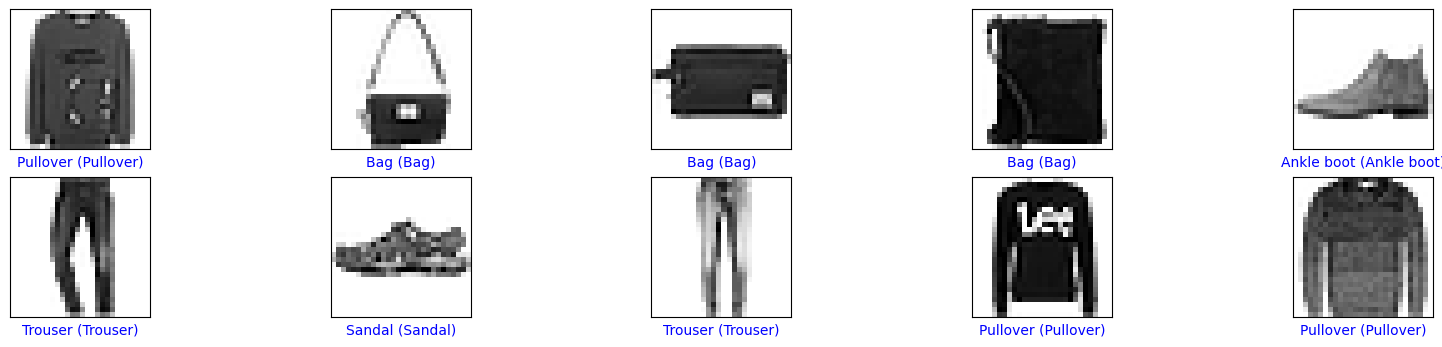

In [57]:
n_rows = 2
n_cols = 5
n_images = n_rows*n_cols

plt.figure(figsize=(2*2*n_cols, 2*n_rows))

for i in range(n_images):
  plt.subplot(n_rows, n_cols, i+1)
  plot_image(i, predictions, y_test, x_test)
plt.show()


## Siames

In [14]:
siames_model = SiamesAlexNet()

siames_model_state_dict = torch.load('lightning_logs/version_1/checkpoints/epoch=4-step=4690.ckpt')['state_dict']

siames_model.load_state_dict(siames_model_state_dict)

<All keys matched successfully>

### Get data

In [22]:
randomed_indexes_1 = np.random.randint(0, len(test_dataloader), 10)
randomed_indexes_2 = np.random.randint(0, len(test_dataloader), 10)

x_test_1 = test_dataset.images[randomed_indexes_1]
x_test_2 = test_dataset.images[randomed_indexes_2]

x_test_transformed_1 = torch.stack([test_dataset.transform(i) for i in x_test_1])
x_test_transformed_2 = torch.stack([test_dataset.transform(i) for i in x_test_2])


y_test_1 = test_dataset.labels[randomed_indexes_1]
y_test_2 = test_dataset.labels[randomed_indexes_2]

### Eval

In [27]:
predicted = siames_model((x_test_transformed_1, x_test_transformed_2)).detach().cpu().numpy()

In [44]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

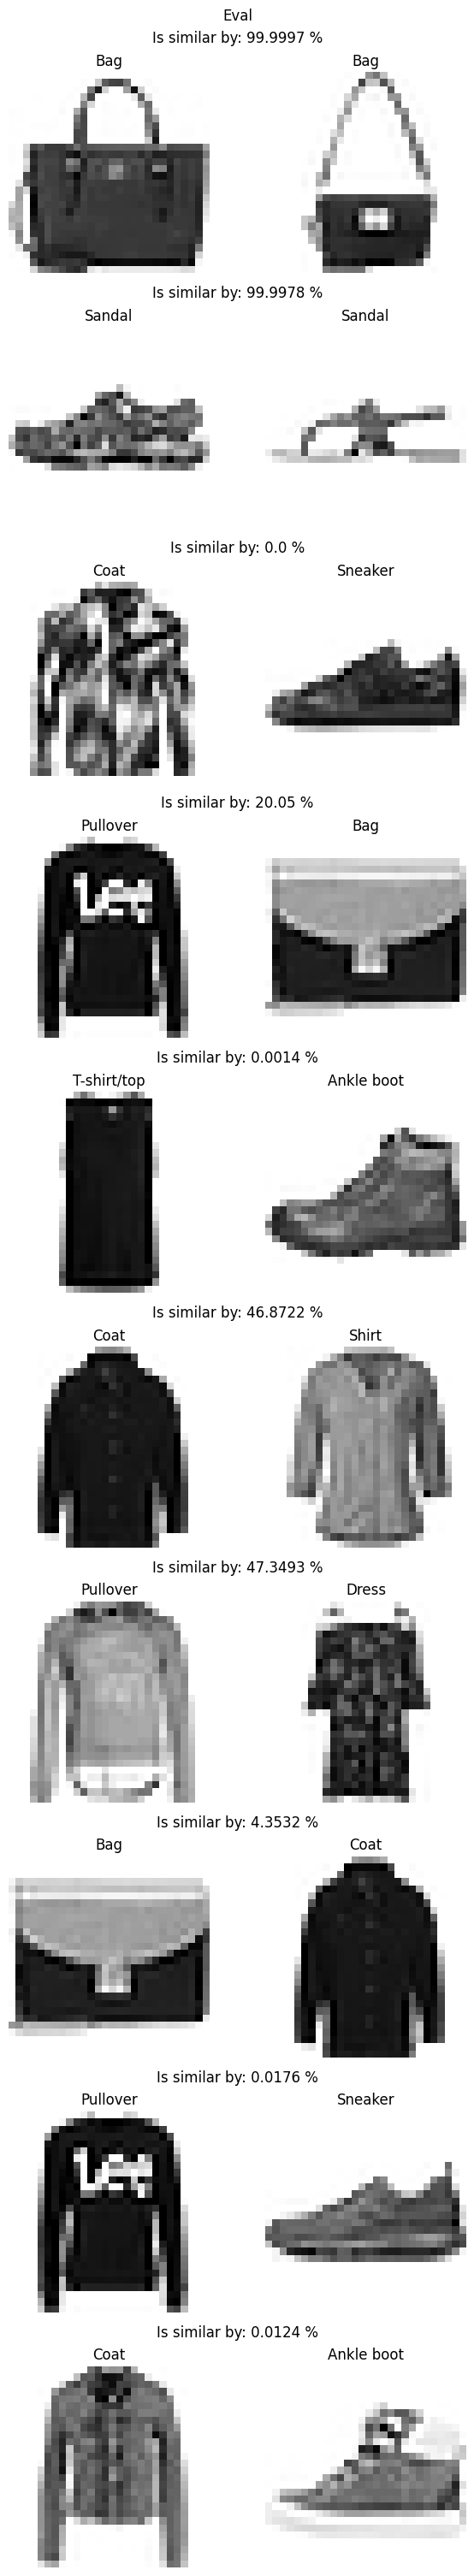

In [60]:
fig = plt.figure(constrained_layout=True, figsize=(6, 30))

fig.suptitle('Eval')

subfigs = fig.subfigures(nrows=10, ncols=1)

for subfig, image_1, image_2, y_1, y_2, predict in zip(subfigs, x_test_1, x_test_2, y_test_1, y_test_2, predicted):

    subfig.suptitle(f'Is similar by: {np.round(predict[0] * 100, 4)} %')

    # create 1x3 subplots per subfig
    axs = subfig.subplots(nrows=1, ncols=2)

    for ax, image, y in zip(axs, [image_1, image_2], [y_1, y_2]):
        ax.imshow(image, cmap=plt.cm.binary)
        ax.set_title(f'{class_names[y]}')
        ax.axis('off')

# t-SNE

In [14]:
x, y = next(iter(test_dataloader))

In [28]:
x_test_features = []
y_test = []

for batch in test_dataloader:
    x, y = batch

    x_test_features.extend(list(alexnet_model.get_features(x).detach().detach().cpu().numpy()))
    y_test.extend(list(y.detach().cpu().numpy()))

In [31]:
x_test_features = np.array(x_test_features)
y_test = np.array(y_test)

In [34]:
tsne_obj = TSNE(n_components=2,
    init='pca',
    random_state=42,
    method='barnes_hut',
    n_iter=1000,
    verbose=1)
tsne_features = tsne_obj.fit_transform(x_test_features)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.025s...
[t-SNE] Computed neighbors for 10000 samples in 11.508s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.737962
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.242134
[t-SNE] KL divergence after 1000 iterations: 1.591964


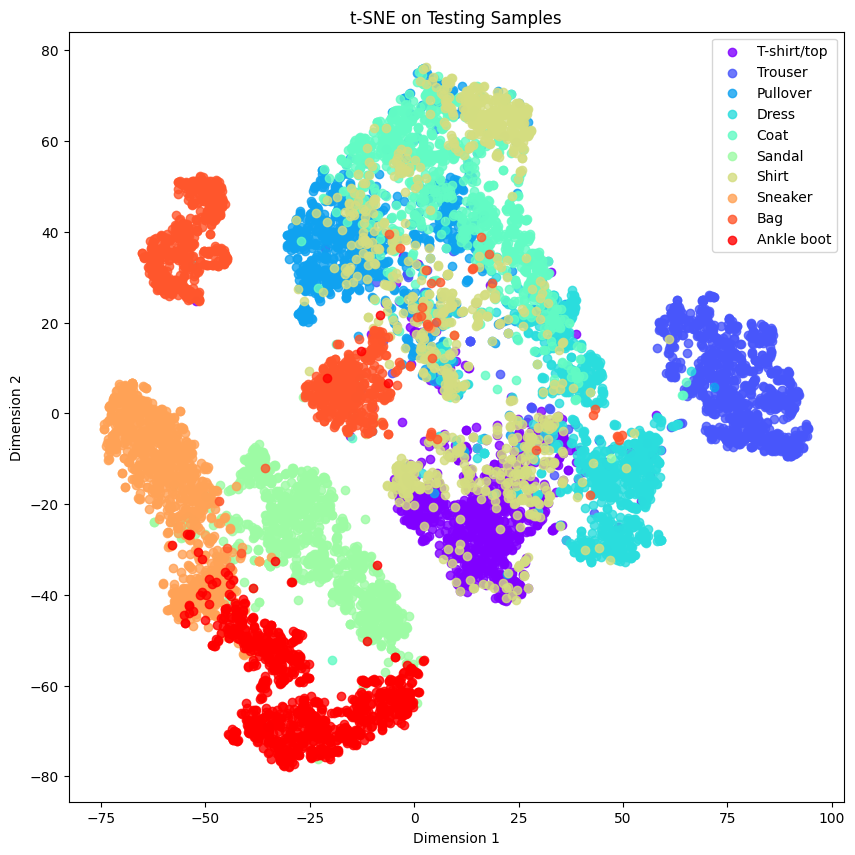

In [35]:
obj_categories = [
                    'T-shirt/top','Trouser','Pullover','Dress',
                    'Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'
                 ]
colors = plt.cm.rainbow(np.linspace(0, 1, 10))
plt.figure(figsize=(10, 10))

for c_group, (c_color, c_label) in enumerate(zip(colors, obj_categories)):
    plt.scatter(tsne_features[np.where(y_test == c_group), 0],
        tsne_features[np.where(y_test == c_group), 1],
        marker='o',
        color=c_color,
        linewidth=1,
        alpha=0.8,
        label=c_label)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE on Testing Samples')
plt.legend(loc='best')
plt.savefig('clothes_dist.png')
plt.show(block=False)